<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22. Ordinary Differential Equation - Initial Value Problems

22.1 ODE Initial Value Problem Statement

An ODE equation could be easily written in the form:

$F(x,f(x),f'(x),...,f^{(n-1)}x)$=f^{(n)}

where n shows what order the differential equation is

There are many applications of ODE equations such as pendulum, free fall problems with friction.

There are also partial differential equations with multiple variables

$\frac{\partial u(t, x, y, z)}{\partial t} = \alpha \left( \frac{\partial u(t, x, y, z)}{\partial x} + \frac{\partial u(t, x, y, z)}{\partial y} + \frac{\partial u(t, x, y, z)}{\partial z} \right)$

There are many solutions to differential equations. They are together called the general equation. If the general equation satisfies a set of initial conditions, it is a particular solution.

The process of finding an answer given a set of initial conditions is called intial value problem.

For example
$y''+8y'+25y=0$


In [1]:
import numpy as np
x = np.linspace(0,10,20)
a=1
b=2
#the general solution is where a and b are unknowns
#in this case we assume one particular solution to be a=1 and b=2
y = np.exp(-4*x)*(a*np.cos(3*x)+b*np.sin(3*x))


22.2 Reduction of Order

Many methods are created to solve first order differential equations. So in order to solve equations of higher orders, we break them into many first order differential equations.

Consider a state: $S(t) = S(t) = \begin{array}{c}
    f(t) \\
    f^{(1)}(t) \\
    f^{(2)}(t) \\
    f^{(3)}(t) \\
    \vdots \\
    f^{(n-1)}(t)
\end{array}$

By taking the derivative of the state, wee can assign them into many coupled first order differential equations.

For example: $y''+y'+y=2$

Let $y_1=y$ and $y_2=y'$. Therefore, we have two coupled first order equations as

$y_2=y_1'$ and $y_2'+y_2+y_1=2$


22.3 Euler Method

Let $\frac{dS(t)}{dt} = F(t, S(t))$, the slope at point j can be used to approximate the next one at j+1

Where: $S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).$

Here are the steps:
\begin{align*}
&\text{Store } S_0 = S(t_0) \text{ in an array } S. \\
&\text{Compute } S(t_1) = S_0 + hF(t_0, S_0). \\
&\text{Store } S_1 = S(t_1) \text{ in } S. \\
&\text{Compute } S(t_2) = S_1 + hF(t_1, S_1). \\
&\text{Store } S_2 = S(t_2) \text{ in } S. \\
&\vdots \\
&\text{Compute } S(t_f) = S_{f-1} + hF(t_{f-1}, S_{f-1}). \\
&\text{Store } S_f = S(t_f) \text{ in } S. \\
&\text{Where } S \text{ is an approximation of the solution to the initial value problem.}
\end{align*}

This method acts like it is integrating the ODE.


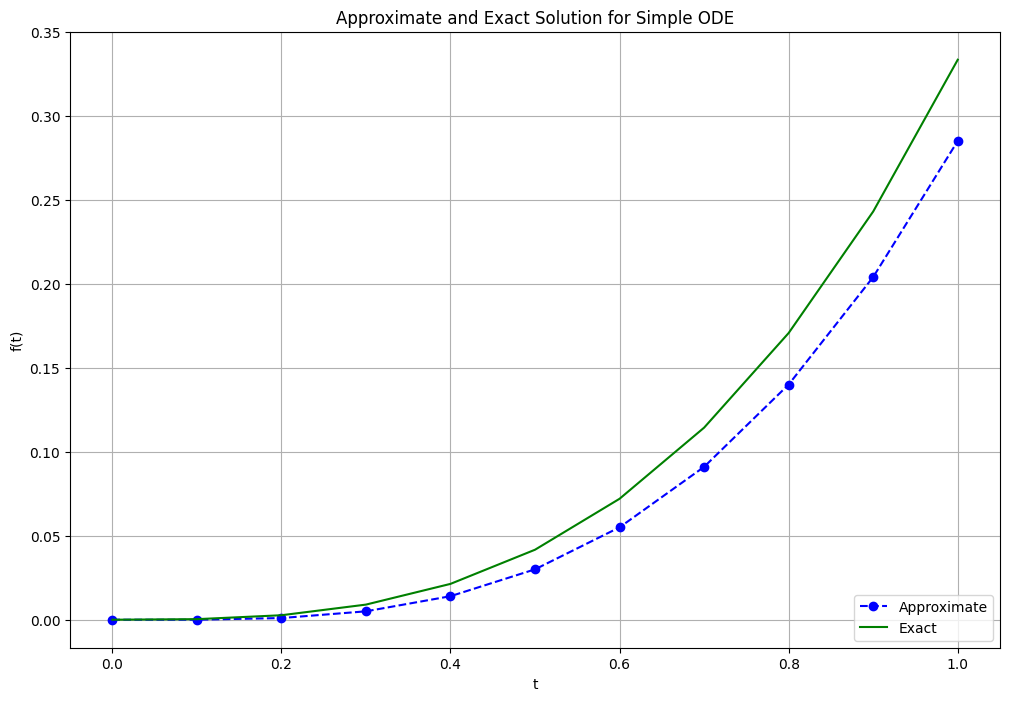

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = lambda t, s: t**2 # ODE
h = 0.1# Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = 0 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, 1/3*t**3, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

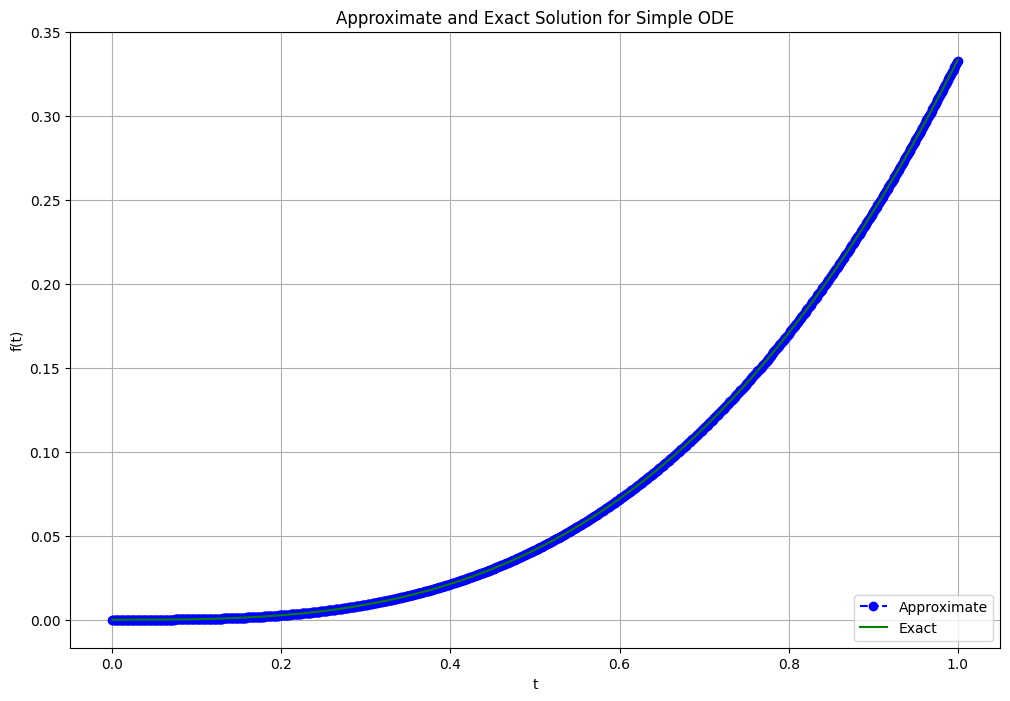

In [3]:
## changing to a smaller step size, we obtain the same line as the exact
h = 0.001# Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = 0 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, 1/3*t**3, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

22.4 Numerical Error and Instability

Two main issues regarding about the integration schemes: accuracy and stability

As we notice from the last section, the smaller h is, the better the value gets to the actual value. This ability to get closer to the actual value is about accuracy. It could be written in the following symbol $O(h^p)$

The ability to keep the error from growing over time is called stability. If the errors do not grow over time, then it is stable.

Choices of h can lead to stable and unstable status.

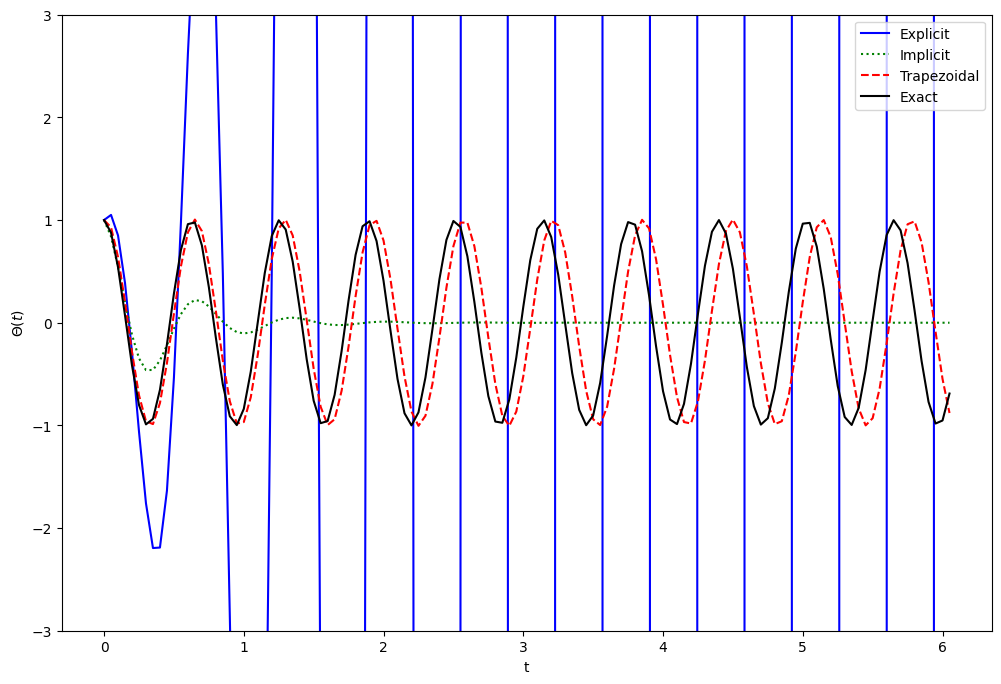

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# define step size
h = 0.05
# define numerical grid
t = np.arange(0, 6.1, h)
# oscillation freq. of pendulum
w = 10
s0 = np.array([[1], [1]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()


22.5 Predictor-Corrector and Runge Kutta Methods

The predictor-corrector breaks the formula down to two parts: predictor and corrector

First, it predicts multiple states and then correct them by taking weighted result.

The midpoint method has:
A predictor: $S(t_{j+1} + \frac{h}{2}) = S(t_j) + \frac{h}{2} F(t_j, S(t_j)).$
A corrector: $S(t_{j+1}) = S(t_j) + hF(t_j + \frac{h}{2}, S(t_j + \frac{h}{2})).
$

Runge Kutta method uses the first two terms of the taylor series from this general form.

$S(t_{j+1}) = S(t_j + h) = S(t_j) + S'(t_j)h + \frac{1}{2!}S''(t_j)h^2 + \ldots + \frac{1}{n!}S^{(n)}(t_j)h^n.
$

Similarly, we can find the second order

$k_1=F(t_j,S(t_j))$,
$k_2=F(t_j+ph,S(t_j)+qhk_1)$

$S(t_{j+1}) = S(t_j) + \frac{1}{2}(k_1 + k_2)h
$

And the fourth order as:

$k_1=F(t_j,S(t_j))$

$k_2=F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h)$

$k_3=F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h)$

$k_4=F(t_j+h,S(t_j)+k_3h)$

$S(t_{j+1}) = S(t_j) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$


22.6. Python ODE Solver

Similarly to other methods, we also have bultin functions to solve ODE initial value problems.

Let's consider $\frac{dS(t)}{dt}=t^2$. Plot the exact solution and relative error with initial value of $S(0)=2$

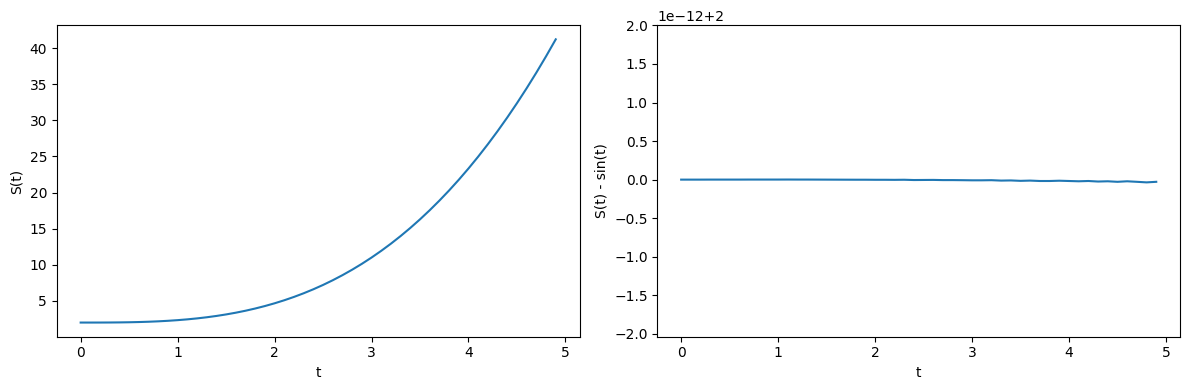

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: t**2
def func(x):
  return 1/3*x**3
t_eval = np.arange(0, 5, 0.1)
sol = solve_ivp(F, [0, 5], [2], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - func(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()